In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as PLT
from tensorflow.keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.resnet import ResNet152, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
os.path.expanduser('/home/masoud/.keras/')

'/home/masoud/.keras/'

In [ ]:
# import gc
# del model_conv
# gc.collect()

In [4]:
model_conv = ResNet152(weights='imagenet', input_shape=(150,150,3), include_top=False)

In [ ]:
model_conv.summary()

In [50]:
image_generator = ImageDataGenerator(
    rescale=1.0/255.0
)
img_count = 4
batch_size = 2

featuers = np.zeros(shape=(img_count,5,5,2048))
labels = np.zeros(shape=(img_count))

generator = image_generator.flow_from_directory(
    '../../../datasets/CatVsDog/',
    class_mode='binary',
    batch_size=batch_size,
    target_size=(150,150)
)

img_count_test = 6
featuers_test = np.zeros(shape=(img_count_test,5,5,2048))
labels_test = np.zeros(shape=(img_count_test))
generator_test = image_generator.flow_from_directory(
    '../../../datasets/CatVsDog_test/',
    class_mode='binary',
    batch_size=batch_size,
    target_size=(150,150)
)

Found 4 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [51]:
i = 0
for input_batch, label_batch in generator:
    featuers[i*batch_size:(i+1)*batch_size] = model_conv.predict(input_batch, verbose=False)
    labels[i*batch_size:(i+1)*batch_size] = label_batch
    i+=1
    if(i*batch_size) >= img_count:
        break
featuers = np.reshape(featuers,(featuers.shape[0],-1)) # flatten



i = 0
for input_batch, label_batch in generator_test:
    featuers_test[i*batch_size:(i+1)*batch_size] = model_conv.predict(input_batch, verbose=False)
    labels_test[i*batch_size:(i+1)*batch_size] = label_batch
    i+=1
    if(i*batch_size) >= img_count_test:
        break
featuers_test = np.reshape(featuers_test,(featuers_test.shape[0],-1)) # flatten

In [77]:
model = models.Sequential()
model.add(layers.Dense(100,activation='relu',input_dim=featuers.shape[1]))
model.add(layers.Dropout(.3))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [78]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 100)               5120100   
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                                 
Total params: 5,130,301
Trainable params: 5,130,301
Non-trainable params: 0
_________________________________________________________________


In [79]:
history = model.fit(featuers,labels, epochs=100,batch_size=2,validation_data=(featuers_test,labels_test))

Epoch 1/100
2/2 [==============================] - 1s 324ms/step - loss: 0.9119 - accuracy: 0.5000 - val_loss: 1.6964 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 155ms/step - loss: 2.6925 - accuracy: 0.2500 - val_loss: 0.7253 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 158ms/step - loss: 1.5431 - accuracy: 0.5000 - val_loss: 1.4247 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 213ms/step - loss: 1.7877 - accuracy: 0.2500 - val_loss: 1.6847 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 159ms/step - loss: 3.0927 - accuracy: 0.5000 - val_loss: 0.7012 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 161ms/step - loss: 0.2435 - accuracy: 0.7500 - val_loss: 0.7055 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 152ms/step - loss: 1.5808 - accuracy: 0.5000 - val_loss: 0.6510 - val_accuracy: 0.5000
Epoch 8/100
2

Epoch 59/100
2/2 [==============================] - 0s 156ms/step - loss: 0.0416 - accuracy: 1.0000 - val_loss: 0.5896 - val_accuracy: 0.6667
Epoch 60/100
2/2 [==============================] - 0s 150ms/step - loss: 0.6294 - accuracy: 0.7500 - val_loss: 0.9214 - val_accuracy: 0.6667
Epoch 61/100
2/2 [==============================] - 0s 160ms/step - loss: 0.0346 - accuracy: 1.0000 - val_loss: 1.2351 - val_accuracy: 0.6667
Epoch 62/100
2/2 [==============================] - 0s 161ms/step - loss: 0.0616 - accuracy: 1.0000 - val_loss: 1.4982 - val_accuracy: 0.6667
Epoch 63/100
2/2 [==============================] - 0s 158ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.7088 - val_accuracy: 0.6667
Epoch 64/100
2/2 [==============================] - 0s 193ms/step - loss: 0.0913 - accuracy: 1.0000 - val_loss: 1.5303 - val_accuracy: 0.6667
Epoch 65/100
2/2 [==============================] - 0s 181ms/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 1.3449 - val_accuracy: 0.6667
Epoch 

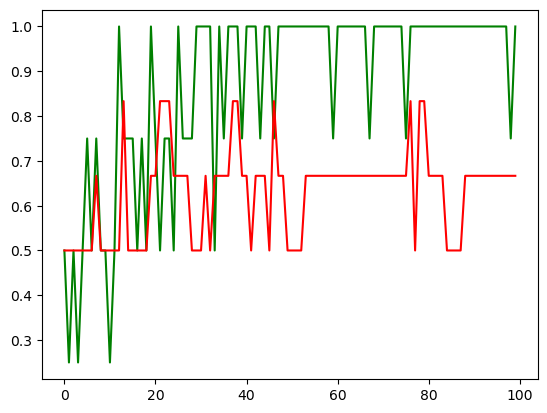

In [80]:
PLT.plot(history.history['accuracy'],color='green')
PLT.plot(history.history['val_accuracy'],color='red')

# Simplest Way For Transfer Learning

In [81]:
model_conv = ResNet152(weights='imagenet', input_shape=(150,150,3), include_top=False)

In [82]:
image_generator = ImageDataGenerator(
    rescale=1.0/255.0
)
batch_size = 2

generator = image_generator.flow_from_directory(
    '../../../datasets/CatVsDog/',
    class_mode='binary',
    batch_size=batch_size,
    target_size=(150,150)
)

generator_test = image_generator.flow_from_directory(
    '../../../datasets/CatVsDog_test/',
    class_mode='binary',
    batch_size=batch_size,
    target_size=(150,150)
)

Found 4 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [84]:
model_conv.summary()

Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']     

 conv2_block3_2_conv (Conv2D)   (None, 38, 38, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 38, 38, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 38, 38, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 38, 38, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_blo

 conv3_block3_2_conv (Conv2D)   (None, 19, 19, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 19, 19, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 19, 19, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 19, 19, 512)  66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv3_block6_2_relu (Activatio  (None, 19, 19, 128)  0          ['conv3_block6_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_3_conv (Conv2D)   (None, 19, 19, 512)  66048       ['conv3_block6_2_relu[0][0]']    
                                                                                                  
 conv3_block6_3_bn (BatchNormal  (None, 19, 19, 512)  2048       ['conv3_block6_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block6_add (Add)         (None, 19, 19, 512)  0           ['conv3_block5_out[0][0]',       
                                                                  'conv3_block6_3_bn[0][0]']      
          

                                                                                                  
 conv4_block1_3_conv (Conv2D)   (None, 10, 10, 1024  263168      ['conv4_block1_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block1_0_bn (BatchNormal  (None, 10, 10, 1024  4096       ['conv4_block1_0_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 conv4_block1_3_bn (BatchNormal  (None, 10, 10, 1024  4096       ['conv4_block1_3_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 conv4_blo

 ization)                                                                                         
                                                                                                  
 conv4_block4_2_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block4_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block4_3_conv (Conv2D)   (None, 10, 10, 1024  263168      ['conv4_block4_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block4_3_bn (BatchNormal  (None, 10, 10, 1024  4096       ['conv4_block4_3_conv[0][0]']    
 ization)                       )                                                                 
          

 conv4_block7_2_bn (BatchNormal  (None, 10, 10, 256)  1024       ['conv4_block7_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_2_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block7_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_3_conv (Conv2D)   (None, 10, 10, 1024  263168      ['conv4_block7_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block7_3_bn (BatchNormal  (None, 10, 10, 1024  4096       ['conv4_block7_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block10_2_bn (BatchNorma  (None, 10, 10, 256)  1024       ['conv4_block10_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block10_2_relu (Activati  (None, 10, 10, 256)  0          ['conv4_block10_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block10_3_conv (Conv2D)  (None, 10, 10, 1024  263168      ['conv4_block10_2_relu[0][0]']   
                                )                                                                 
                                                                                                  
 conv4_blo

 conv4_block13_2_conv (Conv2D)  (None, 10, 10, 256)  590080      ['conv4_block13_1_relu[0][0]']   
                                                                                                  
 conv4_block13_2_bn (BatchNorma  (None, 10, 10, 256)  1024       ['conv4_block13_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block13_2_relu (Activati  (None, 10, 10, 256)  0          ['conv4_block13_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block13_3_conv (Conv2D)  (None, 10, 10, 1024  263168      ['conv4_block13_2_relu[0][0]']   
                                )                                                                 
          

                                                                                                  
 conv4_block16_2_conv (Conv2D)  (None, 10, 10, 256)  590080      ['conv4_block16_1_relu[0][0]']   
                                                                                                  
 conv4_block16_2_bn (BatchNorma  (None, 10, 10, 256)  1024       ['conv4_block16_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_2_relu (Activati  (None, 10, 10, 256)  0          ['conv4_block16_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_3_conv (Conv2D)  (None, 10, 10, 1024  263168      ['conv4_block16_2_relu[0][0]']   
          

 on)                                                                                              
                                                                                                  
 conv4_block19_2_conv (Conv2D)  (None, 10, 10, 256)  590080      ['conv4_block19_1_relu[0][0]']   
                                                                                                  
 conv4_block19_2_bn (BatchNorma  (None, 10, 10, 256)  1024       ['conv4_block19_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block19_2_relu (Activati  (None, 10, 10, 256)  0          ['conv4_block19_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block22_1_relu (Activati  (None, 10, 10, 256)  0          ['conv4_block22_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block22_2_conv (Conv2D)  (None, 10, 10, 256)  590080      ['conv4_block22_1_relu[0][0]']   
                                                                                                  
 conv4_block22_2_bn (BatchNorma  (None, 10, 10, 256)  1024       ['conv4_block22_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block22_2_relu (Activati  (None, 10, 10, 256)  0          ['conv4_block22_2_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block25_1_relu (Activati  (None, 10, 10, 256)  0          ['conv4_block25_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block25_2_conv (Conv2D)  (None, 10, 10, 256)  590080      ['conv4_block25_1_relu[0][0]']   
                                                                                                  
 conv4_block25_2_bn (BatchNorma  (None, 10, 10, 256)  1024       ['conv4_block25_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block25_2_relu (Activati  (None, 10, 10, 256)  0          ['conv4_block25_2_bn[0][0]']     
 on)      

 lization)                                                                                        
                                                                                                  
 conv4_block28_1_relu (Activati  (None, 10, 10, 256)  0          ['conv4_block28_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block28_2_conv (Conv2D)  (None, 10, 10, 256)  590080      ['conv4_block28_1_relu[0][0]']   
                                                                                                  
 conv4_block28_2_bn (BatchNorma  (None, 10, 10, 256)  1024       ['conv4_block28_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 conv4_block31_1_bn (BatchNorma  (None, 10, 10, 256)  1024       ['conv4_block31_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block31_1_relu (Activati  (None, 10, 10, 256)  0          ['conv4_block31_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block31_2_conv (Conv2D)  (None, 10, 10, 256)  590080      ['conv4_block31_1_relu[0][0]']   
                                                                                                  
 conv4_block31_2_bn (BatchNorma  (None, 10, 10, 256)  1024       ['conv4_block31_2_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block34_1_bn (BatchNorma  (None, 10, 10, 256)  1024       ['conv4_block34_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block34_1_relu (Activati  (None, 10, 10, 256)  0          ['conv4_block34_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block34_2_conv (Conv2D)  (None, 10, 10, 256)  590080      ['conv4_block34_1_relu[0][0]']   
                                                                                                  
 conv4_block34_2_bn (BatchNorma  (None, 10, 10, 256)  1024       ['conv4_block34_2_conv[0][0]']   
 lization)

 conv5_block1_1_conv (Conv2D)   (None, 5, 5, 512)    524800      ['conv4_block36_out[0][0]']      
                                                                                                  
 conv5_block1_1_bn (BatchNormal  (None, 5, 5, 512)   2048        ['conv5_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block1_1_relu (Activatio  (None, 5, 5, 512)   0           ['conv5_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block1_2_conv (Conv2D)   (None, 5, 5, 512)    2359808     ['conv5_block1_1_relu[0][0]']    
                                                                                                  
 conv5_blo

Total params: 58,370,944
Trainable params: 0
Non-trainable params: 58,370,944
__________________________________________________________________________________________________


In [112]:
model_conv.trainable = False

# model_conv.trainable = False
# set_trainable=False
# for layer in model_conv.layers:
#     if layer.name in ['conv2_block1_1_conv']:
#         set_trainable = True
#     else:
#         set_trainable = False
    
#     if set_trainable == True:
#         layer.trainable = True
#     else:
#         layer.trainable = True

In [113]:
model = models.Sequential()
model.add(model_conv)
model.add(layers.Flatten())
model.add(layers.Dense(100,activation='relu' ))
model.add(layers.Dropout(.3))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [114]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 5, 5, 2048)        58370944  
                                                                 
 flatten_3 (Flatten)         (None, 51200)             0         
                                                                 
 dense_31 (Dense)            (None, 100)               5120100   
                                                                 
 dropout_13 (Dropout)        (None, 100)               0         
                                                                 
 dense_32 (Dense)            (None, 100)               10100     
                                                                 
 dense_33 (Dense)            (None, 1)                 101       
                                                                 
Total params: 63,501,245
Trainable params: 5,130,301


In [117]:
history = model.fit(
    generator,
    steps_per_epoch=2,
    validation_data=generator_test,
    validation_steps=2
)

2/2 [==============================] - 3s 3s/step - loss: 2.5303 - accuracy: 0.0000e+00 - val_loss: 1.6156 - val_accuracy: 0.5000


In [118]:
history.history

{'loss': [2.5303263664245605],
 'accuracy': [0.0],
 'val_loss': [1.6156466007232666],
 'val_accuracy': [0.5]}